# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
# This library powers Amazon SageMaker Debugger, and helps you develop better, faster and cheaper models by catching common errors quickly. 
!pip install smdebug;

  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp37-cp37m-manylinux2010_x86_64.whl (20 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import os
os.environ

environ{'REGION_NAME': 'us-east-1',
        'HOSTNAME': 'datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395',
        'CONDA_MD5': 'd63adf39f2c220950a063e0529d4ff74',
        'HOME': '/root',
        'CONDA_VERSION': 'py38_4.8.3',
        'AWS_CONTAINER_CREDENTIALS_RELATIVE_URI': '/_sagemaker-instance-credentials/ce50424d1bbf22880b9812c2709a20e8e7d168d95169a1bc8081b81141766f44',
        'PYTHONNOUSERSITE': '0',
        'AWS_DEFAULT_REGION': 'us-east-1',
        'PATH': '/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/opt/amazon/bin:/tmp/miniconda3/condabin:/tmp/anaconda3/condabin:/tmp/miniconda2/condabin:/tmp/anaconda2/condabin:/tmp/mambaforge/condabin',
        'LANG': 'C.UTF-8',
        'AWS_ACCOUNT_ID': '053987932055',
        'DEBIAN_FRONTEND': 'noninteractive',
        'SHELL': '/bin/bash',
        'AWS_REGION': 'us-east-1',
        'AWS_INTERNAL_IMAGE_OWNER': 'Studio',
        'CONDA_DIR': '/opt/.sagemakerinternal/conda',
        'LC_ALL': 'C.U

In [41]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3
import pandas as pd

from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

sagemaker_session = sagemaker.Session()

bucket = sagemaker_session.default_bucket()
prefix = "sagemaker/project4"

role = sagemaker.get_execution_role()

#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [ ]:
#TODO: Fetch and upload thttps://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.ziphe data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

In [ ]:
# Upload files to s3
inputs = sagemaker_session.upload_data(path="dogImages", bucket=bucket, key_prefix=prefix)
print("input spec (in this case, just an S3 path): {}".format(inputs))

In [15]:
inputs = 's3://sagemaker-us-east-1-053987932055/sagemaker/project4'
bucket

'sagemaker-us-east-1-053987932055'

 ### EDA

,# train,# valid,# test
Dog Breed,,,
001.Affenpinscher,64,8,9
002.Afghan_hound,58,7,8
003.Airedale_terrier,52,7,6
004.Akita,63,8,8
005.Alaskan_malamute,77,9,10
...,...,...,...
129.Tibetan_mastiff,48,6,6
130.Welsh_springer_spaniel,44,6,5
131.Wirehaired_pointing_griffon,30,4,3



--- Distribution ---

          # train     # valid      # test
count  133.000000  133.000000  133.000000
mean    50.225564    6.278195    6.293233
std     11.863885    1.350384    1.722322
min     26.000000    4.000000    3.000000
25%     42.000000    6.000000    5.000000
50%     50.000000    6.000000    6.000000
75%     61.000000    7.000000    8.000000
max     77.000000    9.000000   10.000000

 --- Split distribution ---


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82dfbcdd50>,
      dtype=object)


 --- Class distribution ---


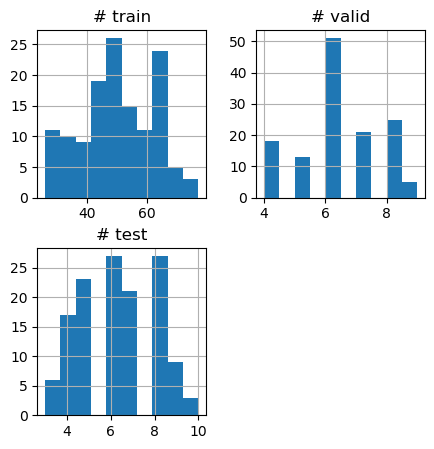

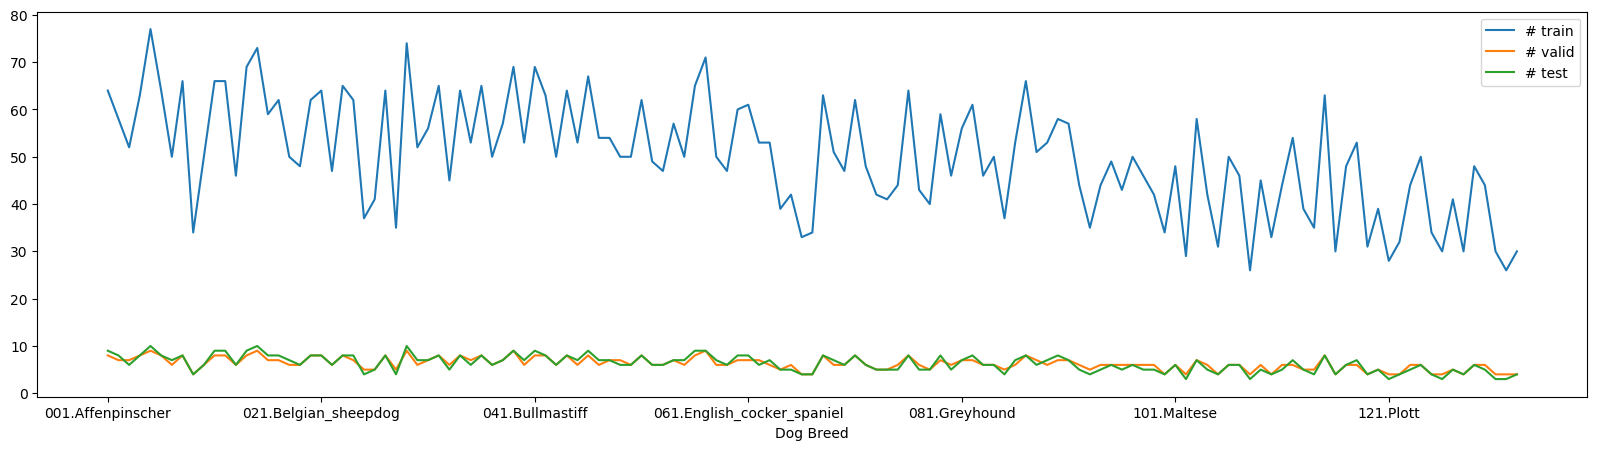

In [42]:
%matplotlib inline
classes = sorted(os.listdir(os.path.join('dogImages', 'train')))
testlist = []
trainlist = []
validlist = []
for _class in classes:
    trainlist.append(len([file for file in os.listdir(os.path.join('dogImages', 'train', _class))]))
    validlist.append(len([file for file in os.listdir(os.path.join('dogImages', 'valid', _class))]))
    testlist.append(len([file for file in os.listdir(os.path.join('dogImages', 'test', _class))]))
    
df_stats = pd.DataFrame(
    {
        "Dog Breed" : list(classes),
        "# train" : trainlist,
        "# valid" : validlist,
        "# test"  : testlist 
    })
df_stats = df_stats.set_index("Dog Breed")
display(df_stats)

print("\n--- Distribution ---\n")
print(df_stats.describe())

print("\n --- Split distribution ---")
display(df_stats.hist(figsize=(5, 5)));

print("\n --- Class distribution ---")
df_stats.plot(figsize=(20, 5)) 

In [30]:
df_stats

,Dog Breed,# train,# valid,# test
0,001.Affenpinscher,64,8,9
1,002.Afghan_hound,58,7,8
2,003.Airedale_terrier,52,7,6
3,004.Akita,63,8,8
4,005.Alaskan_malamute,77,9,10
...,...,...,...,...
128,129.Tibetan_mastiff,48,6,6
129,130.Welsh_springer_spaniel,44,6,5
130,131.Wirehaired_pointing_griffon,30,4,3
131,132.Xoloitzcuintli,26,4,3


In [43]:
s3 = boto3.client('s3')
testlist = []
trainlist = []
validlist = []
r = [(testlist,'test'), (trainlist,'train'), (validlist,'valid')]

for i in r:
   
    result = s3.list_objects_v2(Bucket=bucket, Prefix='sagemaker/project4/{}/'.format(i[1]),    Delimiter='/')
    for obj in result.get('CommonPrefixes'):

        i[0].append(obj.get('Prefix').split('.')[1].split('/')[0])                            
    print('number of classes for {} is {}'.format(i[1],len(i[0])))                      

number of classes for test is 5
number of classes for train is 5
number of classes for valid is 5


## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [ ]:
#TODO: Declare your HP ranges, metrics etc.

In [44]:
from sagemaker.pytorch import PyTorch

estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.large"
    #instance_type="ml.c5.2xlarge"
)

In [45]:
hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch_size": CategoricalParameter([32, 64, 128])
}

In [9]:
! python hpo.py

Traceback (most recent call last):
  File "hpo.py", line 4, in <module>
    import torch
ModuleNotFoundError: No module named 'torch'


In [10]:
hyperparameter_ranges

{'lr': <sagemaker.parameter.ContinuousParameter at 0x7f82e78a0c50>,
 'batch_size': <sagemaker.parameter.CategoricalParameter at 0x7f82e78a0c90>}

In [57]:
objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [58]:
tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=2,
    max_parallel_jobs=2,
    objective_type=objective_type,
)

In [59]:
inputs

's3://sagemaker-us-east-1-053987932055/sagemaker/project4'

In [64]:
# TODO: Fit your HP Tuner
tuner.fit(inputs, wait=True) # TODO: Remember to include your data channels

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


..............................................................*


UnexpectedStatusException: Error for HyperParameterTuning job pytorch-training-230620-1839: Failed. Reason: No objective metrics found after running 2 training jobs. Please ensure that the custom algorithm is emitting the objective metric as defined by the regular expression provided.

In [ ]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()

In [ ]:
tuner.best_training_job()

In [ ]:
# test code
# run this cell to check current status of hyperparameter tuning job
region = boto3.Session().region_name
sm_client = boto3.Session().client('sagemaker')

tuning_job_result = sm_client.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName = tuning_job_name)

status = tuning_job_result['HyperParameterTuningJobStatus']
if status != 'Completed':
    print('Reminder: the tuning job has not been completed.')
    
job_count = tuning_job_result['TrainingJobStatusCounters']['Completed']
print(f"{job_count} training jobs have completed")
    
is_minimize = (tuning_job_result['HyperParameterTuningJobConfig']['HyperParameterTuningJobObjective']['Type'] != 'Maximize')
objective_name = tuning_job_result['HyperParameterTuningJobConfig']['HyperParameterTuningJobObjective']['MetricName']

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [ ]:
# TODO: Set up debugging and profiling rules and hooks

In [ ]:
# TODO: Create and fit an estimator

estimator = # TODO: Your estimator here

In [ ]:
# TODO: Plot a debugging output.

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [ ]:
# TODO: Display the profiler output

## Model Deploying

In [ ]:
# TODO: Deploy your model to an endpoint

predictor=estimator.deploy() # TODO: Add your deployment configuration like instance type and number of instances

In [ ]:
# TODO: Run an prediction on the endpoint

image = # TODO: Your code to load and preprocess image to send to endpoint for prediction
response = predictor.predict(image)

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()